# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
store = pd.read_csv("store.csv")
train = pd.read_csv("train(2).csv")
test = pd.read_csv("test(1).csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4720\3172074719.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train(2).csv")


In [3]:
store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [4]:
train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1


# EDA

### Store

##### <p style="font-size: 20px">Checking Missing Values</p>

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
null_counts = store.isnull().sum()
print(null_counts)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


<p style="font-size: 16px">There are missing values present in CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceWeek, Promo2SinceWeek, Promo2SinceYear and PromoInterval</p>

In [7]:
store.shape[0] - (store[store.Promo2 == 0].Promo2).shape[0]

571

<p style="font-size: 16px">The data which is missing in Promo2SinceWeek, Promo2SinceYear and PromoInterval columns are because the stores did not had any Promo2 campaign ongoing.</p>

In [95]:
store.loc[store.CompetitionDistance.isnull(), "CompetitionDistance"] = store.CompetitionDistance.mean()

##### <p style="font-size: 20px">Visualising Data and Finding Insights</p>

In [8]:
print(f"Average Competition Distance: {store.CompetitionDistance.mean():.2f} meters")

Average Competition Distance: 5404.90 meters


<p style="font-size: 16px">Promo2 vs CompetitionDistance</p>

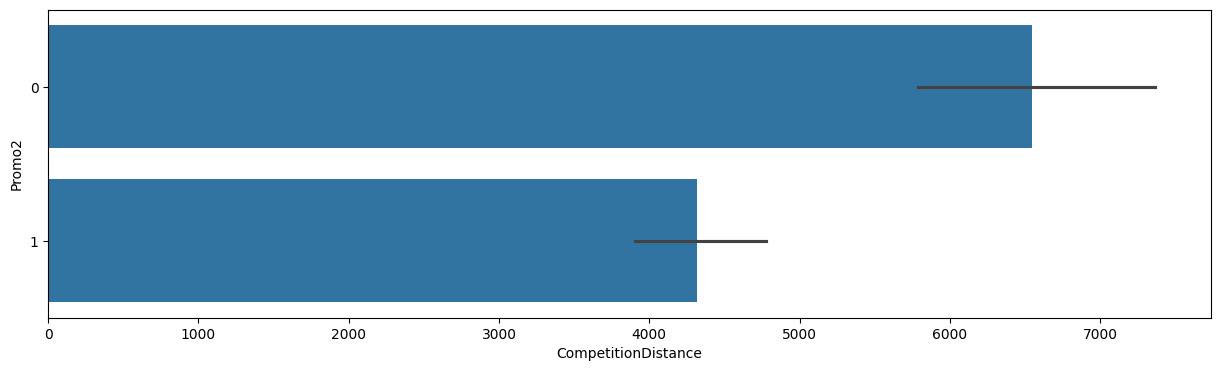

In [9]:
plt.figure(figsize=(15,4))
sns.barplot(store, x="CompetitionDistance", y="Promo2", orient='h')
plt.show()

<p style="font-size: 16px">Assortment vs CompetitionDistance</p>

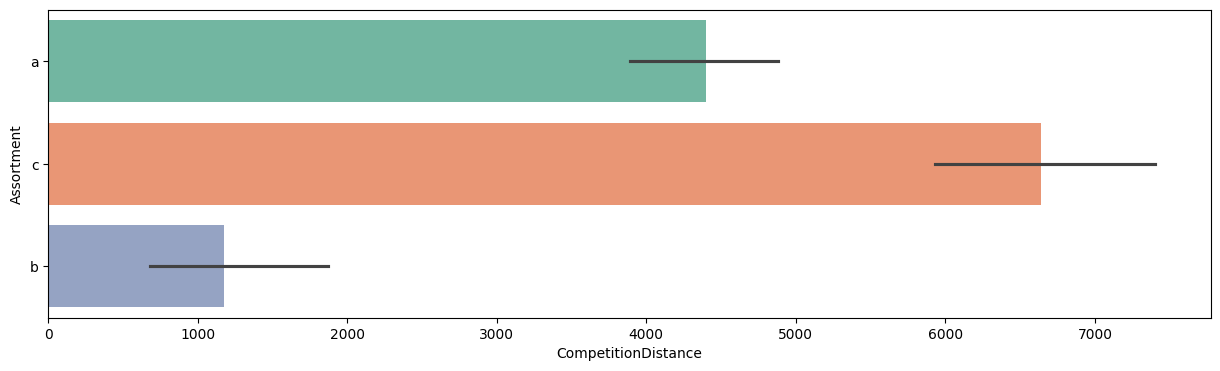

In [10]:
plt.figure(figsize=(15,4))
sns.barplot(store, x="CompetitionDistance", y="Assortment", orient='y', hue="Assortment", palette="Set2")
plt.show()

<p style="font-size: 16px">The total number of stores that started participating in Promo2 by year</p>

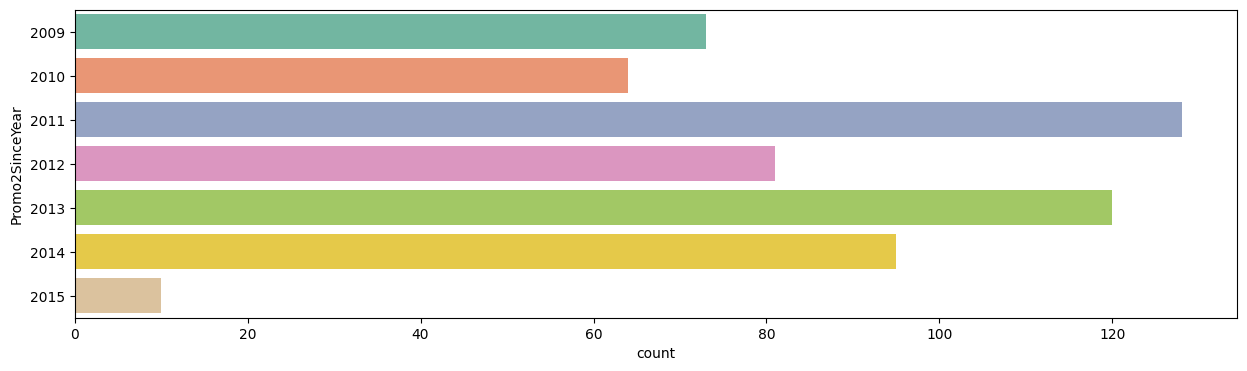

In [11]:
df = store.copy()
df["Promo2SinceYear"] = df.Promo2SinceYear.convert_dtypes()
plt.figure(figsize=(15,4))
sns.countplot(df, y="Promo2SinceYear", hue="Promo2SinceYear", palette="Set2", legend=False)
plt.show()

### Train

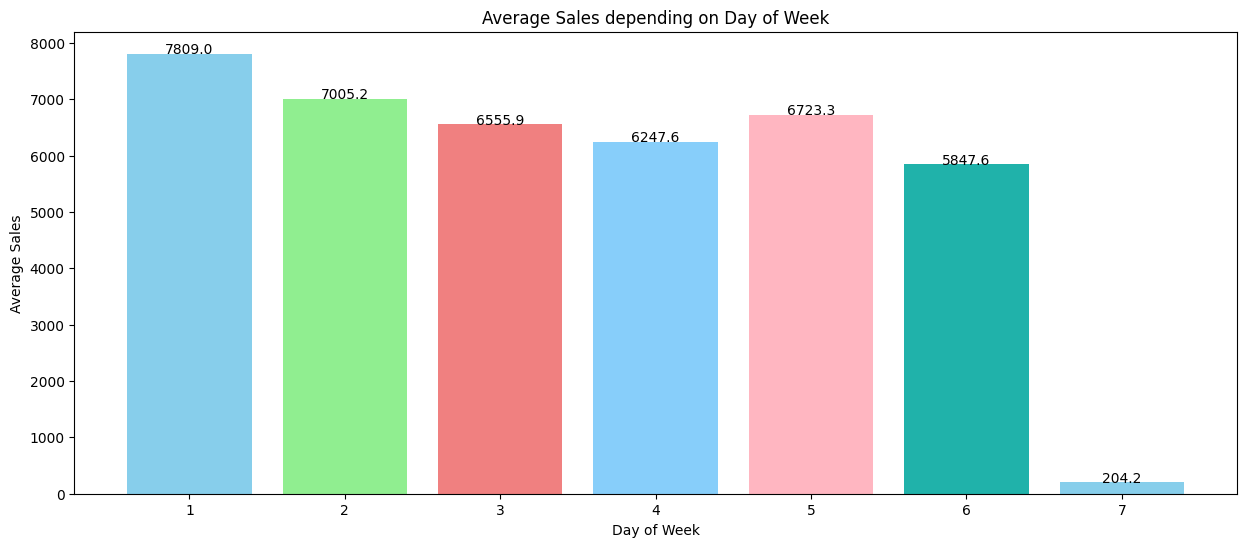

In [38]:
import matplotlib.pyplot as plt

# Define colors for the bars
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightseagreen']

# Group by DayOfWeek and calculate mean sales
groupedData = train.groupby(['DayOfWeek'])
groupedStoresWeek = groupedData['Sales'].mean()

# Create the plot
plt.figure(figsize=(15, 6))
bars = plt.bar(groupedStoresWeek.index, groupedStoresWeek.values, color=colors[:len(groupedStoresWeek)])
plt.title("Average Sales depending on Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")

# Add value annotations on the bars
for i, v in enumerate(groupedStoresWeek.values):
    plt.text(groupedStoresWeek.index[i], v + 3, str(round(v, 1)), color='black', fontweight='light', ha='center')

plt.show()

### Merged

In [12]:
df = pd.merge(left=store, right=train, on="Store")
df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,31/07/2015,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,30/07/2015,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,29/07/2015,4782,523,1,1,0,1


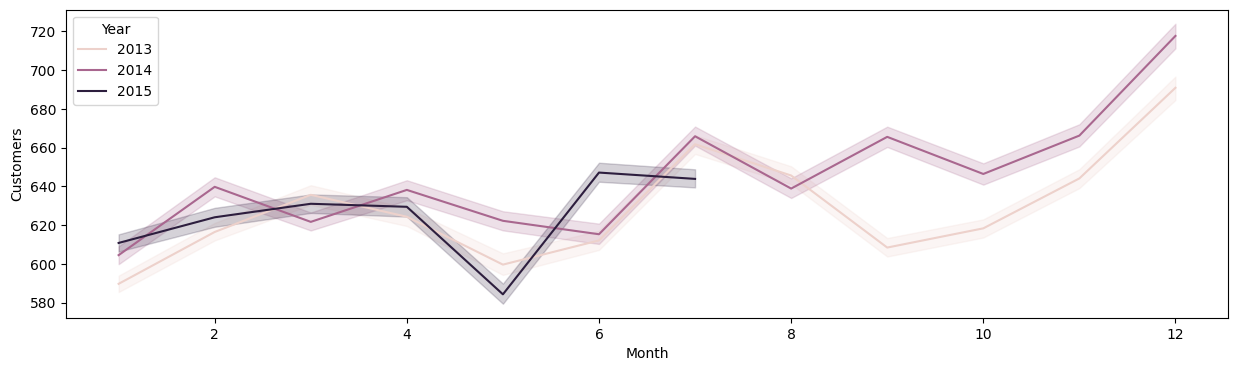

In [68]:
df["Date"] = pd.to_datetime(df.Date)

# Add 'Year' and 'Month columns to your DataFrame
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Plot the data
plt.figure(figsize=(15, 4))
sns.lineplot(x='Month', y='Customers', hue='Year', data=df)
plt.show()

In [ ]:
n_df = df.groupby('Store')[['CompetitionDistance', 'Customers', 'Sales']].mean().reset_index().copy()

# Define bins and labels
bins = [0, 500, 2000, 5000, 10000, 20000, 30000, 40000, float('inf')]  # Ranges for CompetitionDistance
labels = ['0-500', '501-2000', '2001-5000', '5001-10000', '10001-20000', '20001-30000', '30001-40000', '40001+']

# Create a new column for the ranges
n_df['CompetitionDistanceRange'] = pd.cut(n_df['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame
print(n_df[['CompetitionDistance', 'CompetitionDistanceRange']].head())

   CompetitionDistance CompetitionDistanceRange
0               1270.0                 501-2000
1                570.0                 501-2000
2              14130.0              10001-20000
3                620.0                 501-2000
4              29910.0              20001-30000


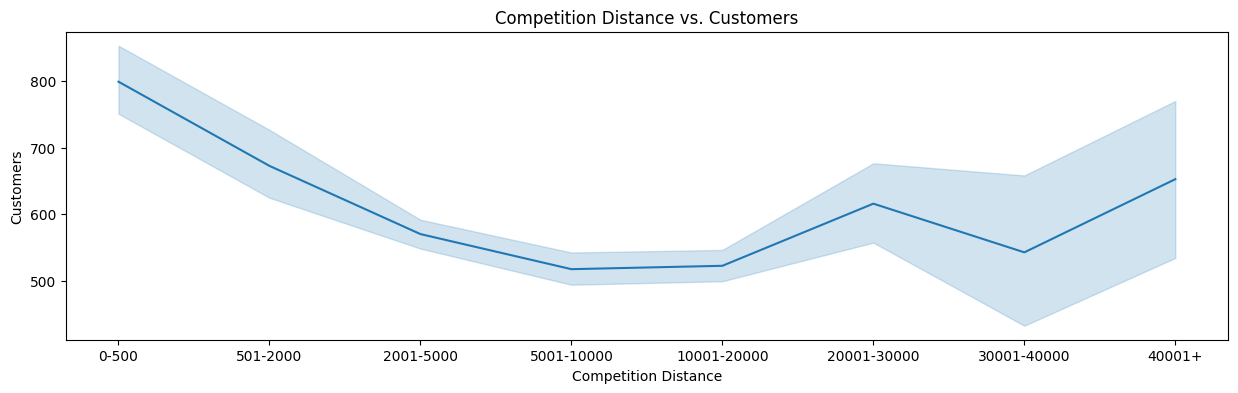

In [72]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='CompetitionDistanceRange', y='Customers', data=n_df)
plt.title("Competition Distance vs. Customers")
plt.xlabel("Competition Distance")
plt.ylabel("Customers")
plt.show()

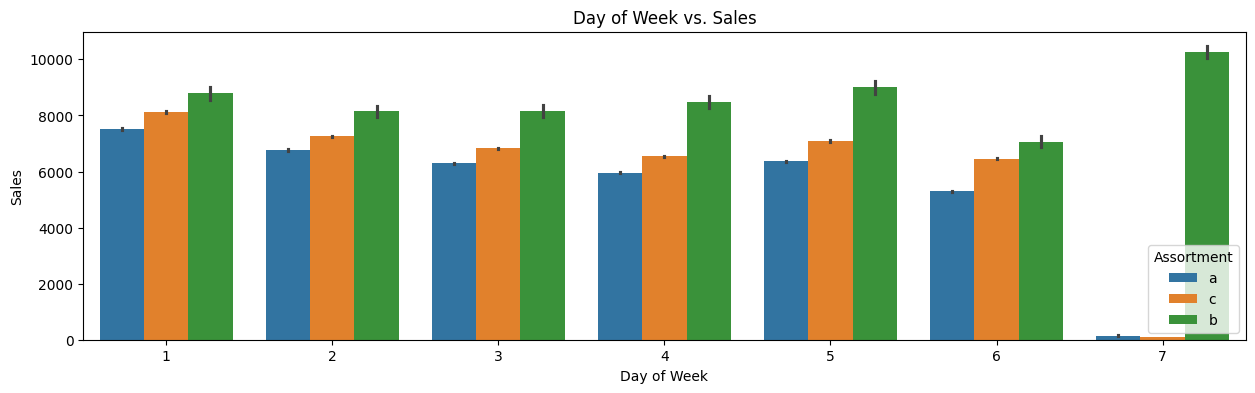

In [78]:
plt.figure(figsize=(15, 4))
sns.barplot(x='DayOfWeek', y='Sales', data=df, hue="Assortment")
plt.title("Day of Week vs. Sales")
plt.xlabel("Day of Week")
plt.ylabel("Sales")
plt.show()

In [82]:
n_df = df.groupby('Store')[['CompetitionDistance', 'Open']].sum().reset_index().copy()

# Define bins and labels
bins = [0, 500, 2000, 5000, 10000, 20000, float('inf')]  # Ranges for CompetitionDistance
labels = ['0-500', '501-2000', '2001-5000', '5001-10000', '10001-20000', '20001+']

# Create a new column for the ranges
n_df['CompetitionDistanceRange'] = pd.cut(n_df['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame
print(n_df[['CompetitionDistance', 'CompetitionDistanceRange']].head())

   CompetitionDistance CompetitionDistanceRange
0            1196340.0                   20001+
1             536940.0                   20001+
2           13310460.0                   20001+
3             584040.0                   20001+
4           28175220.0                   20001+


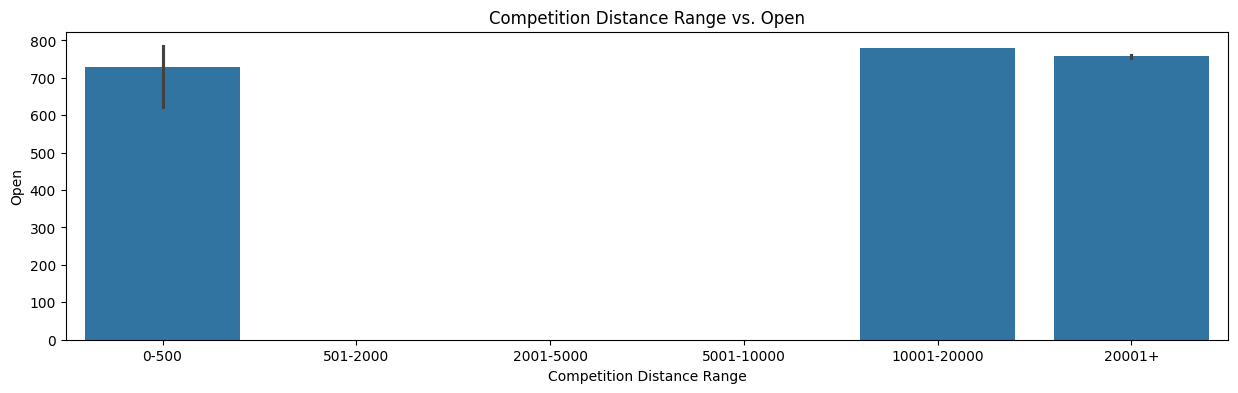

In [83]:
plt.figure(figsize=(15, 4))
sns.barplot(x='CompetitionDistanceRange', y='Open', data=n_df)
plt.title("Competition Distance Range vs. Open")
plt.xlabel("Competition Distance Range")
plt.ylabel("Open")
plt.show()

# Data Transformation

In [84]:
df = pd.merge(left=store, right=train, on="Store")
df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,31/07/2015,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,30/07/2015,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,29/07/2015,4782,523,1,1,0,1


- Checking duplicates

In [90]:
df[df.duplicated()] # No duplicates are present

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


- Checking Missing Values

In [91]:
null_counts = df.isnull().sum()
print(null_counts)

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64


### Data Cleaning

### Data Encoding

### Normalization & Standardization

### Feature Engineering

- Checking Multicolinearity

- Feature Selection

In [ ]:
n_df = pd.get_dummies(df.drop("Date", axis=1), drop_first=True)
corr = n_df.corr()
sns.heatmap(corr)

- Feature Extraction

# Model Training
[Note: Not part of our group work, so it should be done individually]

# Model Testing
[Note: Not part of our group work, so it should be done individually]

# Rough